In [1]:
from pytamp.benchmark import Rearrange1
from pytamp.utils.making_scene_utils import load_mesh, get_obj_name, Make_Scene
from pykin.utils.mesh_utils import get_object_mesh, get_object_mesh_acronym
from pykin.utils import plot_utils as p_utils

import easydict
from pytamp.action.rearrangement import RearrangementAction


def make_scene_():
    def custom_parser():
        # object는 parser.add_argument( ~ , nargs="+") , nargs="+" 때문에 list로 arg 셋팅함
        args = easydict.EasyDict({
            "objects" : [
                        # "/home/juju/contact_graspnet/acronym/grasps/Candle_b94fcdffbd1befa57f5e345e9a3e5d44_0.012740999337464653.h5", 
                        # "/home/juju/contact_graspnet/acronym/grasps/Canister_714320da4aafcb4a47be2353d2b2403b_0.00023318612778400807.h5", 
                        # "/home/juju/contact_graspnet/acronym/grasps/Bowl_2efc35a3625fa50961a9876fa6384765_0.012449533111417973.h5",
                        # "/home/juju/contact_graspnet/acronym/grasps/Xbox360_435f39e98d2260f0d6e21b8525c3f8bb_0.002061950217848804.h5"
                        ],
            
            "support" : "/home/juju/contact_graspnet/acronym/grasps/3Shelves_29b66fc9db2f1558e0e89fd83955713c_0.0025867867973150068.h5",
            "num_grasps" : 5,
            "mesh_root" : '/home/juju/contact_graspnet/acronym/',
            "support_scale" : 0.025
        })
        return args

    obj_dict = {}

    args = custom_parser()

    args.objects.append('ben_cube.stl')
    args.objects.append('bottle.stl')
    args.objects.append('bottle.stl')
    args.objects.append('ben_cube.stl')

    obj_dict = {}
    object_meshes=[]
    object_names=[]

    for o in args.objects:
        if '.h5' in o:
            object_meshes.append(load_mesh(o, mesh_root_dir=args.mesh_root))
            object_names.append(get_obj_name(obj_dict, o))
        if '.stl' in o:
            if 'cube' in o:
#                 object_meshes.append(get_object_mesh(o, 0.075))
                object_meshes.append(get_object_mesh(o, 0.075))
                object_names.append(get_obj_name(obj_dict, o))
            else:
                object_meshes.append(get_object_mesh(o))
                object_names.append(get_obj_name(obj_dict, o))

    # for PYTAMP 
    support_mesh = get_object_mesh("ben_table.stl", scale=[1.0, 1.5, 1.0])
    init_scene = Make_Scene.random_arrangement(object_names, object_meshes, support_mesh)
    goal_scene = Make_Scene.random_arrangement(object_names, object_meshes, support_mesh, for_goal_scene=True)
    rearrangement_scene = Rearrange1('doosan', object_names, init_scene, goal_scene, is_pyplot=False)

    return rearrangement_scene

rearrangement1 = make_scene_()


ArrangementAction = RearrangementAction(rearrangement1.scene_mngr)



*********************** Logical States ***********************
OrderedDict([('ben_cube0',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('bottle0',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('bottle1',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('ben_cube1',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('table',
              {'static': True,
               'support': [Object(name=ben_cube0, pos=[ 0.55908355 -0.25593145  0.84779998]),
                           Object(name=bottle0, pos=[ 0.66050625 -0.17365316  0.83593753]),
                           Object(name=bottle1, pos=[ 0.8918517  -0.24263975  0.83593753]),
                           Object(name=ben_cube1, pos=[0.83878549 0.3652212  0.84779998])]}),
             ('robotiq140_gripper', {'holding': None})])
***************************************************************

*

In [2]:
rearrangement1.goal_scene._poses['ben_cube0']

array([[ 0.99893903,  0.04605236,  0.        ,  0.78089313],
       [-0.04605236,  0.99893903,  0.        , -0.17944071],
       [ 0.        ,  0.        ,  1.        ,  0.84779998],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [3]:
from copy import deepcopy

actions = list(ArrangementAction.get_possible_actions_level_1())
for i in actions:
    print(i)

{'type': 'rearr', 'pick_obj_name': 'ben_cube0', 'rearr_poses': [{'ben_cube0': array([[ 0.99893903,  0.04605236,  0.        ,  0.78089313],
       [-0.04605236,  0.99893903,  0.        , -0.17944071],
       [ 0.        ,  0.        ,  1.        ,  0.84779998],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}]}
{'type': 'rearr', 'pick_obj_name': 'bottle0', 'rearr_poses': []}
{'type': 'rearr', 'pick_obj_name': 'bottle1', 'rearr_poses': [{'bottle1': array([[ 0.80004172,  0.59994436,  0.        ,  0.69847032],
       [-0.59994436,  0.80004172,  0.        , -0.60735932],
       [ 0.        ,  0.        ,  1.        ,  0.87515735],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}]}
{'type': 'rearr', 'pick_obj_name': 'ben_cube1', 'rearr_poses': [{'ben_cube1': array([[-0.18152522,  0.98338629,  0.        ,  0.61237649],
       [-0.98338629, -0.18152522,  0.        ,  0.5979635 ],
       [ 0.        ,  0.        ,  1.        ,  0.84779998],
       [ 0.        ,  0.  

In [ ]:
from copy import deepcopy

actions = list(ArrangementAction.get_possible_actions_level_1())
for i in actions:
    for idx, transition_scene in enumerate(ArrangementAction.get_possible_transitions(scene=ArrangementAction.scene_mngr.scene, goal_location=i)):
        print(i)
        fig, ax = p_utils.init_3d_figure(name="Rearrangement 1")
        ArrangementAction.scene_mngr.render_scene(ax,transition_scene)
        
        ArrangementAction.scene_mngr.show()

In [12]:
transition_scene = ArrangementAction.get_possible_transitions(i)

{'table': Object(name=table, pos=[ 1.    -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[ 0.8052353  -0.06686284  0.84779998]), 'bottle0': Object(name=bottle0, pos=[ 0.70868156 -0.40372074  0.83593754]), 'bottle1': Object(name=bottle1, pos=[ 0.81645215 -0.51892641  0.83593754]), 'ben_cube1': Object(name=ben_cube1, pos=[0.42173466 0.33473607 0.84779998])}


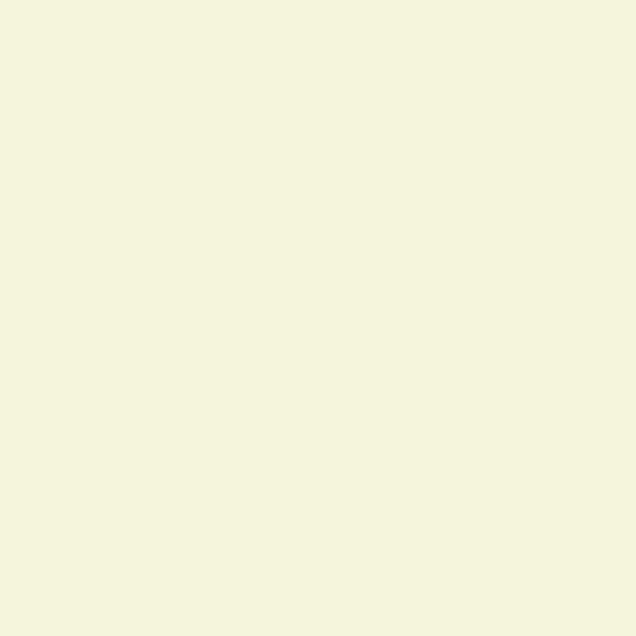

In [3]:
fig, ax = p_utils.init_3d_figure(name="Rearrangement 1")

# init_scene
ArrangementAction.scene_mngr.render_scene(ax)
# ArrangementAction.render_axis(rearrangement1.scene_mngr)
ArrangementAction.scene_mngr.show()

In [3]:
rearrangement1.benchmark_config[rearrangement1.scene_mngr.scene.bench_num]
rearrangement1.scene_mngr.scene.bench_num

0

{'table': Object(name=table, pos=[ 1.    -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[0.78080894 0.5024409  0.84779998]), 'bottle0': Object(name=bottle0, pos=[ 0.61328548 -0.40023773  0.87515735]), 'bottle1': Object(name=bottle1, pos=[ 0.77544779 -0.24791253  0.87515735]), 'ben_cube1': Object(name=ben_cube1, pos=[0.95402742 0.28137147 0.84779998])}


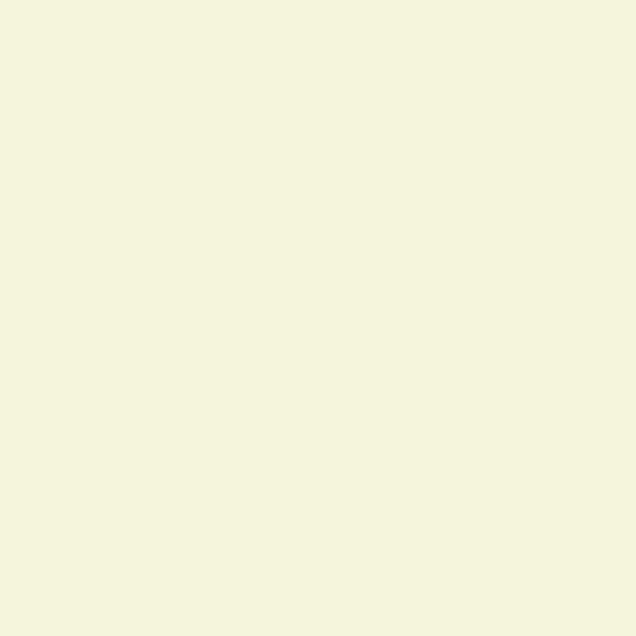

In [6]:
fig, ax = p_utils.init_3d_figure(name="Rearrangement 1")

# init_scene
rearrangement1.goal_scene_mngr.render_scene(ax)
rearrangement1.render_axis(rearrangement1.scene_mngr)
rearrangement1.goal_scene_mngr.show()

In [4]:
ArrangementAction.scene_mngr.scene.objs['bottle0'].h_mat, name

(array([[-0.28999217, -0.95702902,  0.        ,  0.62965436],
        [-0.95702902,  0.28999217,  0.        ,  0.07357164],
        [ 0.        ,  0.        , -1.        ,  0.9054426 ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'bottle1')

In [19]:
import numpy as np
bound = np.zeros((4,4))
bound[2,3] += 0.005
ArrangementAction.scene_mngr.set_object_pose(name,ArrangementAction.scene_mngr.scene.objs['bottle0'].h_mat+bound)

In [27]:
obj_name = 'bottle0'
goal_pose = ArrangementAction.scene_mngr.scene.objs['bottle1'].h_mat+bound

In [28]:
ArrangementAction.scene_mngr.set_object_pose(obj_name,goal_pose)
result, _ = ArrangementAction.scene_mngr.obj_collision_mngr.in_collision_internal(return_names=True)

result, _ 

(True, {('bottle0', 'bottle1')})

In [3]:
import numpy as np

bound = np.zeros((4,4))
bound[2,3] += 0.005

## Object action test

{'table': Object(name=table, pos=[ 1.    -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[ 0.8052353  -0.06686284  0.84779998]), 'bottle0': Object(name=bottle0, pos=[ 0.70868156 -0.40372074  0.83593754]), 'bottle1': Object(name=bottle1, pos=[ 0.81645215 -0.51892641  0.83593754]), 'ben_cube1': Object(name=ben_cube1, pos=[0.42173466 0.33473607 0.84779998])}


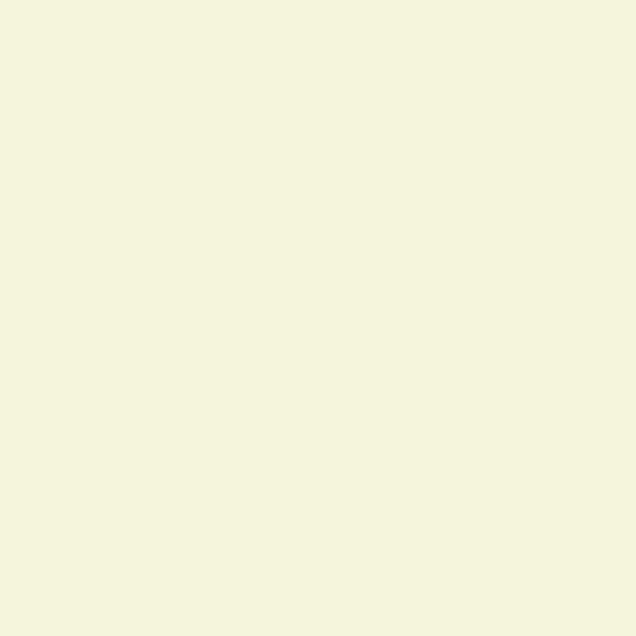

In [7]:
fig, ax = p_utils.init_3d_figure(name="Rearrangement 1")
ArrangementAction.scene_mngr.render_scene(ax)

ArrangementAction.scene_mngr.show()

In [6]:
ArrangementAction.scene_mngr.scene.show_scene_info()

*********************** Scene ***********************
{'ben_cube0': Object(name=ben_cube0, pos=[ 0.8052353  -0.06686284  0.84779998]),
 'ben_cube1': Object(name=ben_cube1, pos=[0.42173466 0.33473607 0.84779998]),
 'bottle0': Object(name=bottle0, pos=[ 0.70868156 -0.40372074  0.83593754]),
 'bottle1': Object(name=bottle1, pos=[ 0.81645215 -0.51892641  0.83593754]),
 'table': Object(name=table, pos=[ 1.    -0.6    0.043])}
doosan Transform(pos=[0.    0.    0.913], rot=[1. 0. 0. 0.])
robotiq140_gripper [[-9.99999959e-01  2.03631704e-04 -2.03756161e-04  5.15974741e-01]
 [ 2.03714682e-04  9.99999896e-01 -4.07304903e-04  3.89836899e-02]
 [ 2.03673199e-04 -4.07346395e-04 -9.99999896e-01  1.54389490e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
***************************************************************



In [11]:
from pykin.utils import transform_utils as t_utils
origin = ArrangementAction.scene_mngr.scene.objs[name].h_mat
t_utils.get_inverse_homogeneous(origin)

array([[ 0.        ,  0.        , -1.        ,  0.84779998],
       [ 0.94871328,  0.3161378 ,  0.        , -0.80160613],
       [ 0.3161378 , -0.94871328,  0.        , -0.03672949],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [12]:
c_T_w = t_utils.get_inverse_homogeneous(origin)
w_T_g = ArrangementAction.scene_mngr.scene.goal_object_poses[name]

c_T_g = c_T_w.dot(w_T_g)

In [13]:
c_T_g

array([[ 0.        ,  0.        , -1.        ,  0.        ],
       [-0.69669138, -0.71737098,  0.        ,  0.27406913],
       [-0.71737098,  0.69669138,  0.        , -0.25329325],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [15]:
w_T_g

array([[-0.88774845, -0.4603289 ,  0.        ,  0.95204342],
       [ 0.4603289 , -0.88774845,  0.        ,  0.54551852],
       [ 0.        ,  0.        ,  1.        ,  0.84779998],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [18]:
c_T_w

array([[ 0.        ,  0.        , -1.        ,  0.84779998],
       [ 0.94871328,  0.3161378 ,  0.        , -0.80160613],
       [ 0.3161378 , -0.94871328,  0.        , -0.03672949],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [19]:
origin

array([[ 0.        ,  0.94871328,  0.3161378 ,  0.77210596],
       [ 0.        ,  0.3161378 , -0.94871328,  0.21857224],
       [-1.        ,  0.        ,  0.        ,  0.84779998],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [12]:
for i in ArrangementAction.scene_mngr.scene.goal_object:
    print(i, ArrangementAction.scene_mngr.scene.objs[i].h_mat)

ben_cube0 [[ 0.         -0.27900744  0.96028894  0.70365156]
 [ 0.         -0.96028894 -0.27900744  0.11268149]
 [ 1.          0.          0.          0.84779998]
 [ 0.          0.          0.          1.        ]]
bottle0 [[-0.12951898 -0.86182988  0.49038157  0.85282765]
 [ 0.07287797  0.48493596  0.87150784 -0.47311008]
 [-0.98889516  0.14861482  0.          0.83593754]
 [ 0.          0.          0.          1.        ]]
bottle1 [[ 0.62422604 -0.4973614  -0.60247282  0.73923477]
 [ 0.47119491 -0.37543156  0.7981394  -0.04151663]
 [-0.62315104 -0.78210152  0.          0.83593754]
 [ 0.          0.          0.          1.        ]]


In [3]:
action_level_1

[['ben_cube0'], ['bottle0'], ['bottle1']]

# action level 1 test

In [8]:
ArrangementAction.scene_mngr.scene.goal_object_poses

{'ben_cube0': array([[-0.93316761,  0.35944153,  0.        ,  0.72849382],
        [-0.35944153, -0.93316761,  0.        ,  0.4838208 ],
        [ 0.        ,  0.        ,  1.        ,  0.84779998],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'bottle0': array([[-0.24010951, -0.97074581,  0.        ,  0.90519833],
        [ 0.97074581, -0.24010951,  0.        ,  0.55772651],
        [ 0.        ,  0.        ,  1.        ,  0.87515735],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'bottle1': array([[-0.90426676,  0.42696794,  0.        ,  0.52745796],
        [-0.42696794, -0.90426676,  0.        ,  0.13228674],
        [ 0.        ,  0.        ,  1.        ,  0.87515735],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'ben_cube1': array([[ 0.05155025, -0.9986704 ,  0.        ,  0.8906531 ],
        [ 0.9986704 ,  0.05155025,  0.        , -0.3202997 ],
        [ 0.        ,  0.        ,  1.        ,  0.84779998],
        [ 0.    

In [10]:
obj_name = 'ben_cube0'
ArrangementAction.scene_mngr.scene.logical_states[obj_name]

{'on': Object(name=table, pos=[ 1.    -0.6    0.043])}

In [11]:
ArrangementAction.scene_mngr.scene.logical_states[obj_name].get(
                ArrangementAction.scene_mngr.scene.logical_state.on
            )

Object(name=table, pos=[ 1.    -0.6    0.043])

In [12]:
ArrangementAction.scene_mngr.scene.objs

{'table': Object(name=table, pos=[ 1.    -0.6    0.043]),
 'ben_cube0': Object(name=ben_cube0, pos=[ 0.8052353  -0.06686284  0.84779998]),
 'bottle0': Object(name=bottle0, pos=[ 0.70868156 -0.40372074  0.83593754]),
 'bottle1': Object(name=bottle1, pos=[ 0.81645215 -0.51892641  0.83593754]),
 'ben_cube1': Object(name=ben_cube1, pos=[0.42173466 0.33473607 0.84779998])}

In [2]:
rearrangement_scene.scene_mngr.scene.goal_object_poses

{'ben_cube0': array([[-0.22549562,  0.97424418,  0.        , -0.05677136],
        [-0.97424418, -0.22549562,  0.        ,  0.09092221],
        [ 0.        ,  0.        ,  1.        ,  0.80479998],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'bottle0': array([[ 0.94909068,  0.31500298,  0.        , -0.33575687],
        [-0.31500298,  0.94909068,  0.        ,  0.06906262],
        [ 0.        ,  0.        ,  1.        ,  0.83215735],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'bottle1': array([[ 0.94334146,  0.33182358,  0.        , -0.28956345],
        [-0.33182358,  0.94334146,  0.        ,  0.9973612 ],
        [ 0.        ,  0.        ,  1.        ,  0.83215735],
        [ 0.        ,  0.        ,  0.        ,  1.        ]])}

{'table': Object(name=table, pos=[ 1.    -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[ 0.8052353  -0.06686284  0.84779998]), 'bottle0': Object(name=bottle0, pos=[ 0.70868156 -0.40372074  0.83593754]), 'bottle1': Object(name=bottle1, pos=[ 0.81645215 -0.51892641  0.83593754]), 'ben_cube1': Object(name=ben_cube1, pos=[0.42173466 0.33473607 0.84779998])}


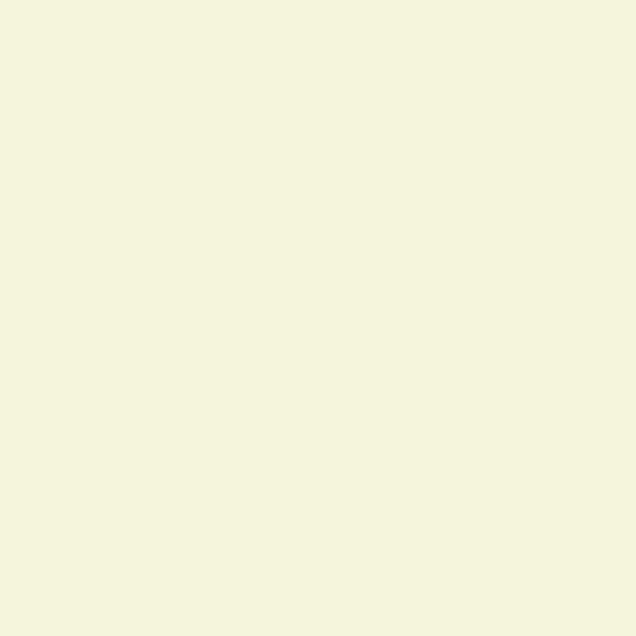

In [16]:
fig, ax = p_utils.init_3d_figure(name="Rearrangement 1")

# init_scene
rearrangement1.scene_mngr.render_scene(ax)
rearrangement1.render_axis(rearrangement1.scene_mngr)
rearrangement1.scene_mngr.show()

{'table': Object(name=table, pos=[ 1.    -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[0.42629558 0.47003529 0.84779998]), 'bottle0': Object(name=bottle0, pos=[ 0.60795884 -0.58375952  0.87515735]), 'bottle1': Object(name=bottle1, pos=[0.93902519 0.57723549 0.87515735])}


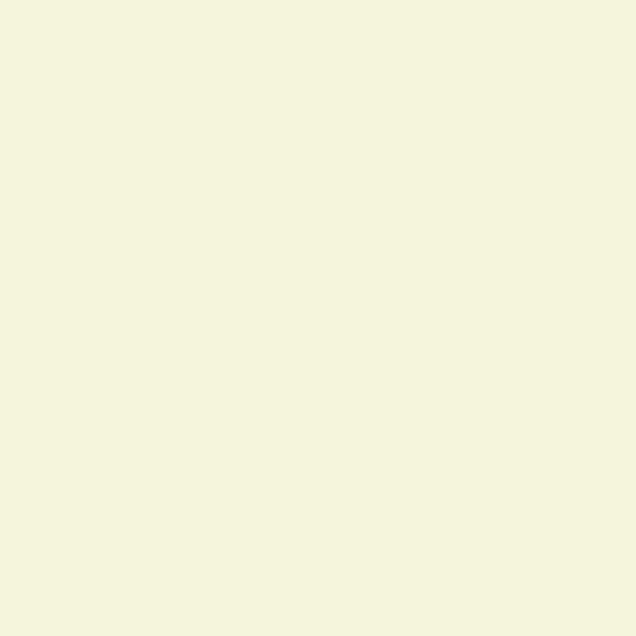

In [4]:
fig, ax = p_utils.init_3d_figure(name="Rearrangement 1")

# init_scene
rearrangement_scene.goal_scene_mngr.render_scene(ax)
rearrangement_scene.render_axis(rearrangement_scene.goal_scene_mngr)
rearrangement_scene.goal_scene_mngr.show()

In [2]:
rearrangement_scene.scene_mngr.scene.benchmark_config

{0: {'object_names': ['ben_cube0', 'bottle0', 'bottle1'],
  'goal_scene': <pytamp.utils.making_scene_utils.Make_Scene at 0x7f16a389a730>}}

In [3]:
rearrangement_scene.goal_scene._poses

{'support_object': array([[ 1.   ,  0.   ,  0.   ,  1.   ],
        [ 0.   ,  1.   ,  0.   , -0.6  ],
        [ 0.   ,  0.   ,  1.   ,  0.043],
        [ 0.   ,  0.   ,  0.   ,  1.   ]]),
 'ben_cube0': array([[ 0.04228472, -0.9991056 ,  0.        ,  0.6273327 ],
        [ 0.9991056 ,  0.04228472,  0.        ,  0.60003369],
        [ 0.        ,  0.        ,  1.        ,  0.84779998],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'bottle0': array([[ 0.39123747, -0.92028976,  0.        ,  0.84156174],
        [ 0.92028976,  0.39123747,  0.        , -0.24405634],
        [ 0.        ,  0.        ,  1.        ,  0.87515735],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'bottle1': array([[ 0.74834252, -0.66331251,  0.        ,  0.89338256],
        [ 0.66331251,  0.74834252,  0.        , -0.42871788],
        [ 0.        ,  0.        ,  1.        ,  0.87515735],
        [ 0.        ,  0.        ,  0.        ,  1.        ]])}

In [14]:
goal_object_poses = {}
for i in rearrangement_scene.scene_mngr.scene.benchmark_config[0]['object_names']:
    print(i)
    goal_object_poses[i] = rearrangement_scene.goal_scene._poses[i]

ben_cube0
bottle0
bottle1


In [15]:
goal_object_poses

{'ben_cube0': array([[ 0.04228472, -0.9991056 ,  0.        ,  0.6273327 ],
        [ 0.9991056 ,  0.04228472,  0.        ,  0.60003369],
        [ 0.        ,  0.        ,  1.        ,  0.84779998],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'bottle0': array([[ 0.39123747, -0.92028976,  0.        ,  0.84156174],
        [ 0.92028976,  0.39123747,  0.        , -0.24405634],
        [ 0.        ,  0.        ,  1.        ,  0.87515735],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'bottle1': array([[ 0.74834252, -0.66331251,  0.        ,  0.89338256],
        [ 0.66331251,  0.74834252,  0.        , -0.42871788],
        [ 0.        ,  0.        ,  1.        ,  0.87515735],
        [ 0.        ,  0.        ,  0.        ,  1.        ]])}

In [5]:
for name, value in rearrangement_scene.goal_scene_mngr.scene.objs.items():
    print(name, ': ', value.h_mat)

table :  [[ 1.     0.     0.     1.   ]
 [ 0.     1.     0.    -0.6  ]
 [ 0.     0.     1.     0.043]
 [ 0.     0.     0.     1.   ]]
ben_cube0 :  [[ 0.04228472 -0.9991056   0.          0.6273327 ]
 [ 0.9991056   0.04228472  0.          0.60003369]
 [ 0.          0.          1.          0.84779998]
 [ 0.          0.          0.          1.        ]]
bottle0 :  [[ 0.39123747 -0.92028976  0.          0.84156174]
 [ 0.92028976  0.39123747  0.         -0.24405634]
 [ 0.          0.          1.          0.87515735]
 [ 0.          0.          0.          1.        ]]
bottle1 :  [[ 0.74834252 -0.66331251  0.          0.89338256]
 [ 0.66331251  0.74834252  0.         -0.42871788]
 [ 0.          0.          1.          0.87515735]
 [ 0.          0.          0.          1.        ]]


In [ ]:
re